In [1]:
from sage.all import *

def metricna_dimenzija_usmerjenega_grafa(graf):
    
    if not isinstance(graf, DiGraph):
        return "Napaka: Podani graf ni usmerjen graf."
    
    # Preverimo močno povezanost grafa
    if not graf.is_strongly_connected():
        return "Graf ni močno povezan. Dimenzije grafa ni mogoče izračunati."
    
    # CLP
    V = graf.vertices()

    lp = MixedIntegerLinearProgram(maximization=False)
    x = lp.new_variable(binary=True)  # Spremenljivke x[v] so binarne (0 ali 1)

    # Cilj: minimizirati vsoto vseh x[v]
    lp.set_objective(sum(x[v] for v in V))

    # omejitve
    for u in V:
        for v in V:
            if u != v:
                # Pogoj da obstaja vsaj eno vozlišče w, tako da je x[w] = 1 in d(u, w) != d(v, w)
                lp.add_constraint(
                    sum(x[w] for w in V if graf.distance(u, w) != graf.distance(v, w)) >= 1
                )

    lp.solve()

    # Pridobimo rezultate
    razresljiva_mnozica = [v for v in V if lp.get_values(x[v]) == 1]
    return razresljiva_mnozica, len(razresljiva_mnozica)


**NEKAJ PRIMEROV UPORABE CLP ZA IZRAČUN METRIČNE DIMENZIJE USMERJENIH GRAFOV:**  



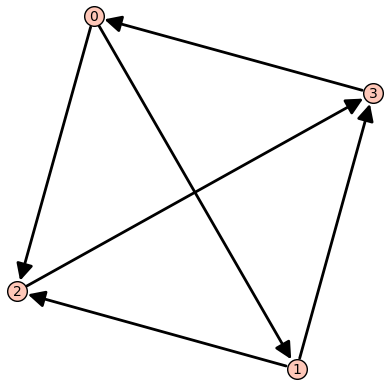

([1], 1)

In [2]:
G = DiGraph({0: [1, 2], 1: [2, 3], 2: [3], 3: [0]})
G.show()
metricna_dimenzija_usmerjenega_grafa(G)


In [3]:
H = Graph([(0, 1), (0, 'a'), (2, 'b')])
H.plot()
metricna_dimenzija_usmerjenega_grafa(H)

'Napaka: Podani graf ni usmerjen graf.'

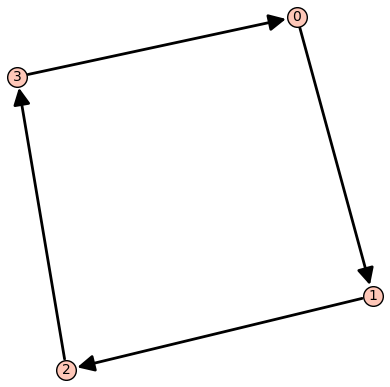

Test 1:
([0], 1)


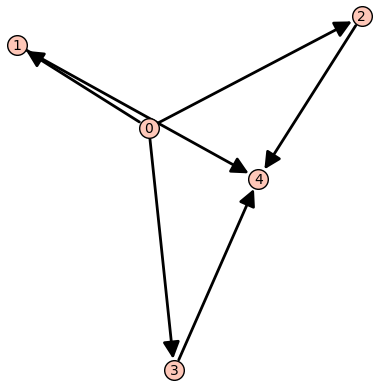

Test 2:
Graf ni močno povezan. Dimenzije grafa ni mogoče izračunati.


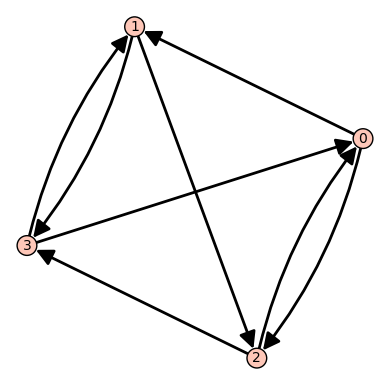

Test 3:
([0, 1], 2)


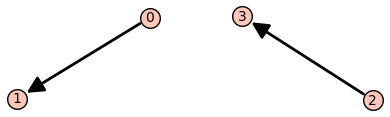

Test 4:
Graf ni močno povezan. Dimenzije grafa ni mogoče izračunati.


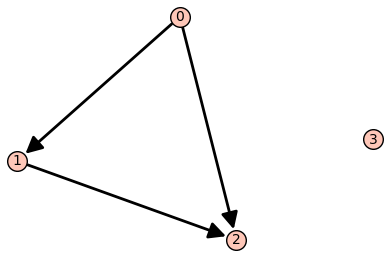

Test 5:
Graf ni močno povezan. Dimenzije grafa ni mogoče izračunati.


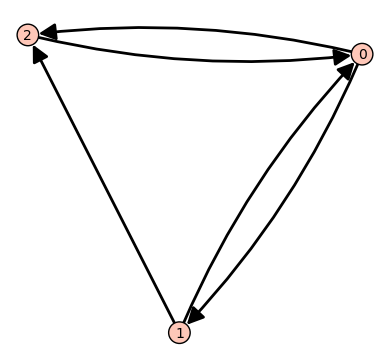

Test 6:
([1], 1)


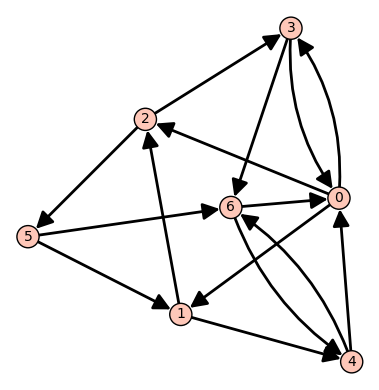

Test 7:
([0, 4], 2)


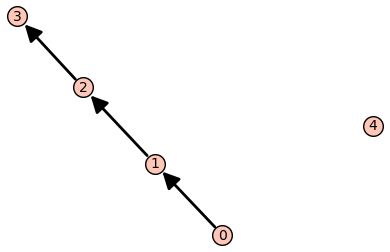

Test 8:
Graf ni močno povezan. Dimenzije grafa ni mogoče izračunati.


In [4]:
grafi = [
    DiGraph({0: [1], 1: [2], 2: [3], 3: [0]}),  # G1
    DiGraph({0: [1, 2, 3], 1: [4], 2: [4], 3: [4], 4: []}),  # G2
    DiGraph({0: [1, 2], 1: [2, 3], 2: [3, 0], 3: [0, 1]}),  # G3
    DiGraph({0: [1], 2: [3]}),  # G4
    DiGraph({0: [1, 2], 1: [2], 2: [], 3: []}),  # G5
    DiGraph({0: [1, 2], 1: [2, 0], 2: [0]}),  # G6
    DiGraph({
        0: [1, 2, 3],
        1: [2, 4],
        2: [3, 5],
        3: [0, 6],
        4: [0, 6],
        5: [1, 6],
        6: [0, 4]
    }),  # G7
    DiGraph({0: [1], 1: [2], 2: [3], 3: [], 4: []})  # G8
]

for i, G in enumerate(grafi, start=1):
    G.show()
    print(f"Test {i}:")
    rezultat = metricna_dimenzija_usmerjenega_grafa(G)
    print(rezultat)


Graf T:


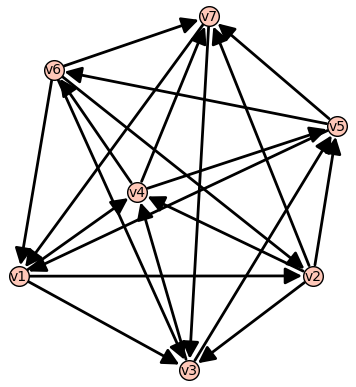

(['v2', 'v4', 'v5'], 3)

In [5]:
T = DiGraph()

vozlisca = ["v1", "v2", "v3", "v4", "v5", "v6", "v7"]
T.add_vertices(vozlisca)

povezave = [

    ("v1", "v2"), ("v1", "v3"), ("v1", "v4"),
    ("v2", "v3"), ("v2", "v4"), ("v2", "v5"), ("v2", "v7"),
    ("v3", "v4"), ("v3", "v5"),
    ("v4", "v7"), ("v4", "v5"), ("v4", "v6"),
    ("v5", "v6"), ("v5", "v7"), ("v5", "v1"),
    ("v6", "v7"), ("v6", "v1"), ("v6", "v2"), ("v6", "v3"),
    ("v7", "v1"), ("v7", "v3")
]

T.add_edges(povezave)

print("Graf T:")
T.show()
metricna_dimenzija_usmerjenega_grafa(T)


**UPORABA  CLP NA CIRKULANTNIH GRAFH:**  



In [34]:
def clockwise_circulant_graph(n, d):
    G = DiGraph()

    # Dodajanje vozlišč
    G.add_vertices(range(n))

    # Dodajanje usmerjenih povezav v smeri urinega kazalca
    for i in range(n):
        for j in range(1, d + 1):
            # Dodajanje povezav v smeri urinega kazalca
            G.add_edge(i, (i + j) % n)

    plot = G.plot(layout="circular", vertex_size=300, vertex_color="skyblue", edge_color="black", 
                  vertex_labels = True)
    
   
    plot.show()

    return G



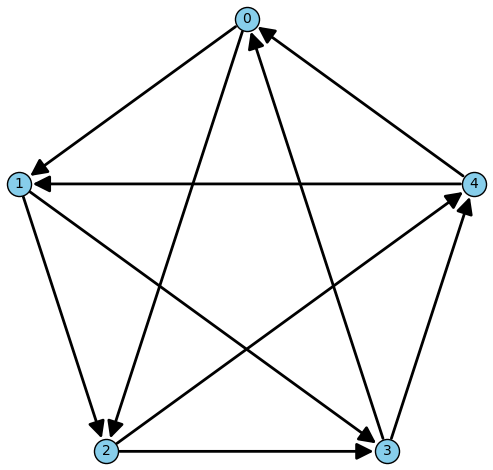

([0, 1], 2)

In [35]:

C5_2 = clockwise_circulant_graph(5, 2)  
metricna_dimenzija_usmerjenega_grafa(C5_2)



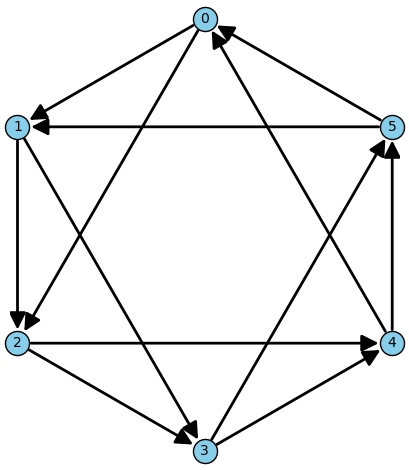

([0, 1], 2)

In [37]:
C6_2 = clockwise_circulant_graph(6, 2)  
metricna_dimenzija_usmerjenega_grafa(C6_2)

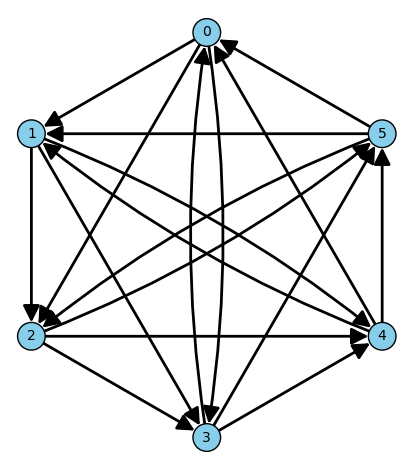

([0, 2, 3], 3)

In [38]:
C6_3 = clockwise_circulant_graph(6, 3) 
metricna_dimenzija_usmerjenega_grafa(C6_3)

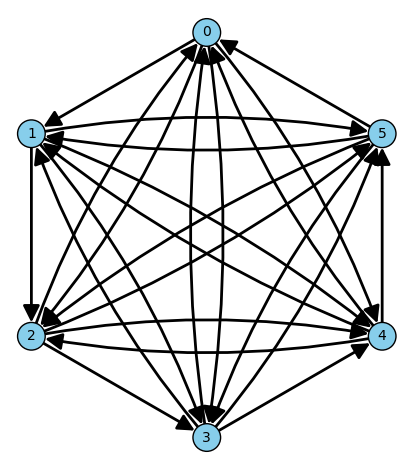

([0, 1, 3], 3)

In [39]:
C6_4 = clockwise_circulant_graph(6, 4)  
metricna_dimenzija_usmerjenega_grafa(C6_4)

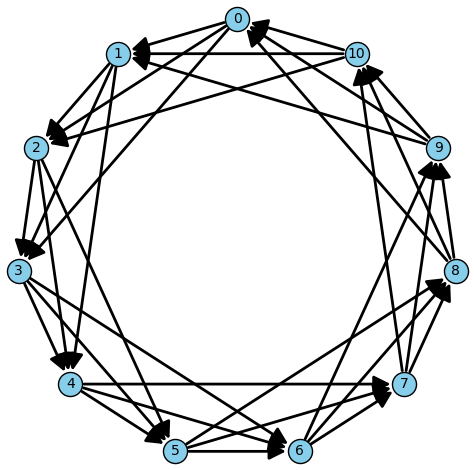

([1, 3, 10], 3)

In [41]:
C11_3 = clockwise_circulant_graph(11, 3)  
metricna_dimenzija_usmerjenega_grafa(C11_3)

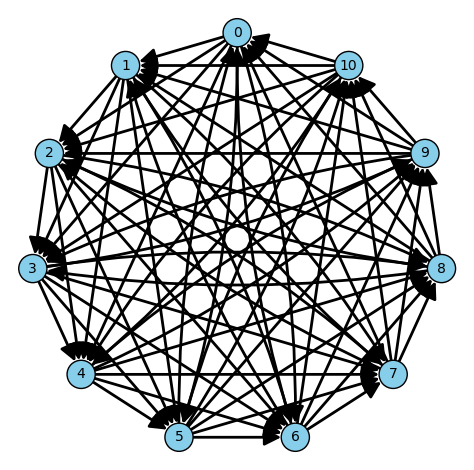

([1, 3, 5, 6, 9], 5)

In [42]:
C11_6 = clockwise_circulant_graph(11, 6)  
metricna_dimenzija_usmerjenega_grafa(C11_6)

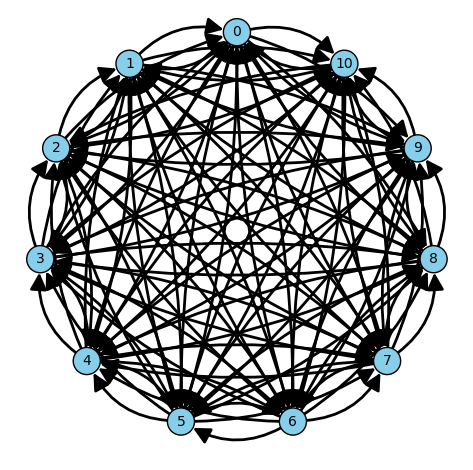

([0, 1, 3, 4, 5, 6, 7, 8, 9, 10], 10)

In [43]:
C11_10 = clockwise_circulant_graph(11, 10)  
metricna_dimenzija_usmerjenega_grafa(C11_10)

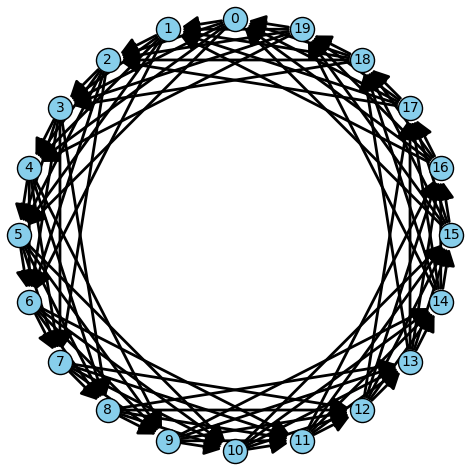

([4, 6, 7, 10, 18], 5)

In [44]:
C20_5 = clockwise_circulant_graph(20, 5)  
metricna_dimenzija_usmerjenega_grafa(C20_5)

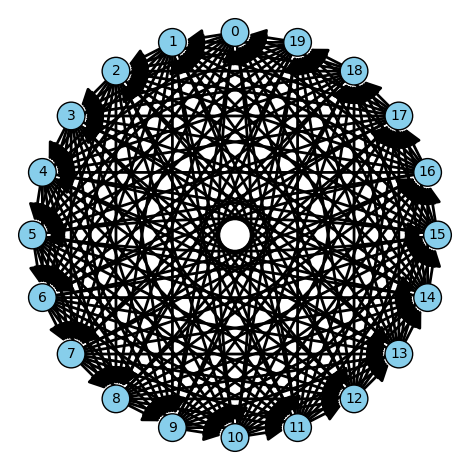

([1, 2, 10, 12, 14, 15, 16, 17, 18, 19], 10)

In [45]:
C20_10 = clockwise_circulant_graph(20, 10)  
metricna_dimenzija_usmerjenega_grafa(C20_10)

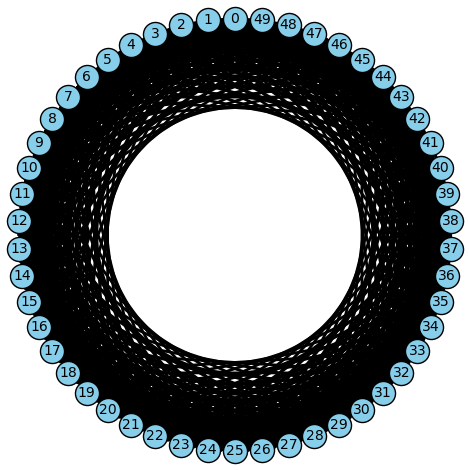

([0, 3, 11, 14, 22, 25, 28, 32, 33, 36, 39, 42], 12)

In [46]:
C50_15 = clockwise_circulant_graph(50, 15)  
metricna_dimenzija_usmerjenega_grafa(C50_15)

TRENUTNE UGOTOVITVE:

- C\(n,1\) = 1 
- C\(n,2\) = 2
- C\(n, n\-1\) = n\-1  
- C\(n,d\) = ⌊n/2⌋, za n/2 &lt;= d &lt; n\-1

